In [1]:
# Load a 3D dose distrubution

In [2]:
path_to_file = "/media/luis/A528-D50C/Hombro20en1/RD_3D_arc1y2.dcm"

In [ ]:
from Dosepy.image import load

img = load(path_to_file)  # Shows an exception. Dosepy is intended for 2D dose distributions

Exception: The DICOM file must have 2D dose distribution.

SimpleITK should be a better approach to work with dose distributions and structures.

In [1]:
import SimpleITK as sitk

In [29]:
img = sitk.ReadImage(path_to_file, outputPixelType=sitk.sitkFloat64)

In [30]:
print(img.GetPixelIDValue())
print(img.GetPixelIDTypeAsString())
print(img.GetNumberOfComponentsPerPixel())

9
64-bit float
1


In [31]:
img.GetSize()

(102, 90, 60)

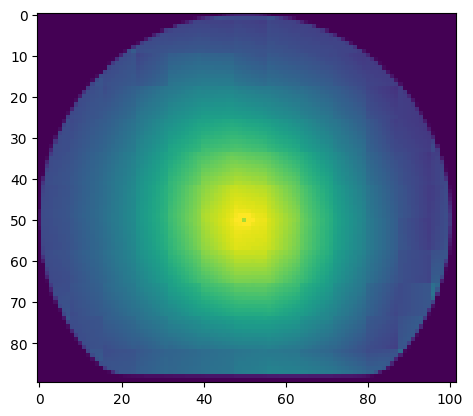

In [32]:
import matplotlib.pyplot as plt

plt.imshow(sitk.GetArrayViewFromImage(img[:,:,50]), vmax=12000)

In [33]:
import numpy as np

np.mean(sitk.GetArrayFromImage(img[50,:,:]))

np.float64(81198.36425925927)

(array([1892.,  430., 2106., 1435., 1077.,  745.,  576.,  444.,  334.,
         141.]),
 array([    0. ,  1233.3,  2466.6,  3699.9,  4933.2,  6166.5,  7399.8,
         8633.1,  9866.4, 11099.7, 12333. ]),
 <BarContainer object of 10 artists>)

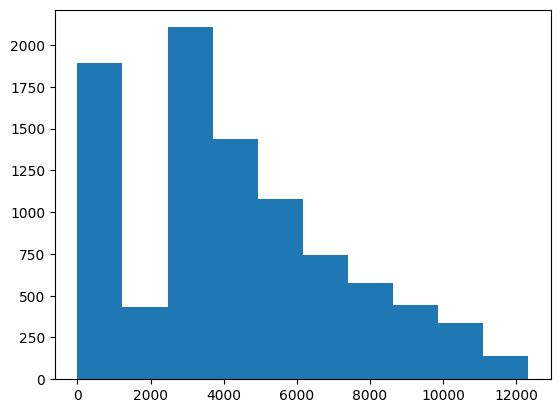

In [34]:
plt.hist(np.ravel(sitk.GetArrayFromImage(img[:,:,50])))

SimpleITK does not calculate the product with DoseGridScaling tag

In [ ]:
#img.GetMetaData("DoseGridScaling")
img.GetMetaDataKeys()

('0008|0005',
 '0008|0012',
 '0008|0013',
 '0008|0016',
 '0008|0018',
 '0008|0020',
 '0008|0021',
 '0008|0023',
 '0008|0030',
 '0008|0031',
 '0008|0033',
 '0008|0050',
 '0008|0060',
 '0008|0070',
 '0008|0080',
 '0008|0090',
 '0008|1010',
 '0008|1030',
 '0008|103e',
 '0008|1040',
 '0008|1048',
 '0008|1070',
 '0008|1090',
 '0010|0010',
 '0010|0020',
 '0010|0030',
 '0010|0032',
 '0010|0040',
 '0018|0050',
 '0018|1000',
 '0018|1020',
 '0020|000d',
 '0020|000e',
 '0020|0010',
 '0020|0011',
 '0020|0032',
 '0020|0037',
 '0020|0052',
 '0020|1040',
 '0028|0002',
 '0028|0004',
 '0028|0008',
 '0028|0009',
 '0028|0010',
 '0028|0011',
 '0028|0030',
 '0028|0100',
 '0028|0101',
 '0028|0102',
 '0028|0103',
 '3004|0002',
 '3004|0004',
 '3004|000a',
 '3004|000c',
 '3004|000e',
 'ITK_original_direction',
 'ITK_original_spacing')

In [21]:
img.GetMetaData('3004|000e')

'1.296932754e-05 '

In [35]:
dose = img * float(img.GetMetaData('3004|000e'))

(array([3432., 3584., 1255.,  398.,  165.,   92.,   65.,   53.,   60.,
          76.]),
 array([ 0.        ,  1.34627586,  2.69255172,  4.03882757,  5.38510343,
         6.73137929,  8.07765515,  9.423931  , 10.77020686, 12.11648272,
        13.46275858]),
 <BarContainer object of 10 artists>)

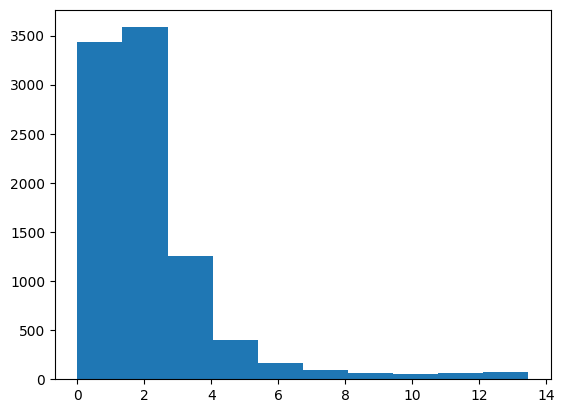

In [47]:
plt.hist(np.ravel(sitk.GetArrayFromImage(dose[:,:,30])))

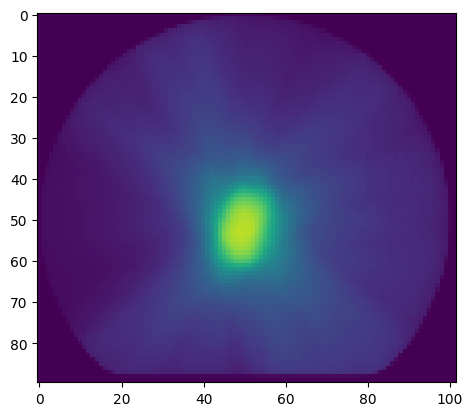

In [48]:
plt.imshow(sitk.GetArrayViewFromImage(dose[:,:,30]), vmax=15)

In [ ]:
from pathlib import Path


def load(path_to_file: str | Path):
    """
    Load a dose distribution from a DICOM file.

    Parameters
    ----------
    path_to_file : str or Path
        The path to the DICOM file containing the dose distribution.

    Returns
    -------
    sitk.Image
        A SimpleITK image object representing the dose distribution.
        
    """

    # Check if the input is a string or Path object
    if not isinstance(path_to_file, (str, Path)):
        raise TypeError("path_to_file must be a string or a Path object.")

    # Convert str to Path if necessary
    if isinstance(path_to_file, str):
        path_to_file = Path(path_to_file)

    # Check if the file exists
    if not path_to_file.is_file():
        raise FileNotFoundError(f"The file {path_to_file} does not exist.")

    # Check if the file is DICOM file
    with open(path_to_file, "rb") as my_file:
        my_file.read(128)  # Skip first bytes

        if my_file.read(4) != b'DICM':
            print(f"{path_to_file} is not a valid dcm file.")
            raise ValueError(f"{path_to_file} is not a valid dcm file.")
        
        
    # Load the DICOM file using SimpleITK
    img = sitk.ReadImage(str(path_to_file), outputPixelType=sitk.sitkFloat64)

    # Check if the tag '3004|000e' exists in the metadata
    if not img.HasMetaDataKey('3004|000e'):
        raise ValueError(f"The DICOM file {path_to_file} does not contain the required metadata tag DoseGridScaling (3004|000e).")

    # Convert image to a dose distribution
    dose = img * float(img.GetMetaData('3004|000e'))

    return dose


In [50]:
with open(path_to_file, "rb") as my_file:
    my_file.read(128)
    print(my_file.read(4))

b'DICM'


In [54]:
load(path_to_file=path_to_file)

/media/luis/A528-D50C/Hombro20en1/RD_3D_arc1y2.dcm is a valid dcm file.


In [56]:
# Check if path_to_file is an instance of Path
if isinstance(path_to_file, Path):
    print(f"{path_to_file} is a Path object.")

## Structures

In [6]:
import numpy as np
import pydicom

path_to_file = "/media/luis/TOMO/Dosepy/Hombro20en1/RS/RS.dcm"

In [9]:
dsS = pydicom.dcmread(path_to_file)

# Imprimir Nombre y número de ROI

for k in np.arange(0,len(dsS.StructureSetROISequence)):
	print(dsS.StructureSetROISequence[k].ROIName)
	print(dsS.StructureSetROISequence[k].ROINumber)

BODY
1
PTV_High
2
CouchSurface
3
CouchInterior
4


In [41]:
contour_sequence = dsS.ROIContourSequence[1].ContourSequence
contour_sequence

<Sequence, length 1>

In [42]:
len(contour_sequence)

1

In [45]:
dsS.ROIContourSequence[1]

(3006,002A) ROI Display Color                   IS: [255, 255, 128]
(3006,0040)  Contour Sequence  1 item(s) ---- 
   (3006,0016)  Contour Image Sequence  1 item(s) ---- 
      (0008,1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008,1155) Referenced SOP Instance UID         UI: 1.2.246.352.71.3.855512968882.1424210.20250616082647
      ---------
   (3006,0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
   (3006,0046) Number of Contour Points            IS: '742'
   (3006,0050) Contour Data                        DS: Array of 2226 elements
   ---------
(3006,0084) Referenced ROI Number               IS: '2'

In [46]:
type(contour_sequence)

pydicom.sequence.Sequence

In [47]:
contour_sequence.count

<bound method Sequence.count of <Sequence, length 1>>

In [48]:
contour_sequence.count

<bound method Sequence.count of <Sequence, length 1>>

In [ ]:


for i in range(len(contour_sequence)):
	contour_data = dsS.ROIContourSequence[1].ContourSequence[i].ContourData  # ROI for PTV correspond to 1
	npoints = dsS.ROIContourSequence[1].ContourSequence[i].NumberOfContourPoints
	print(len(contour_data))
	print(npoints)

	contour_data_array = np.array(contour_data).reshape(npoints,3)
	print(contour_data_array)
	

2226
742
[[  -2.5  -325.15    1.  ]
 [  -1.5  -325.16    1.  ]
 [  -0.5  -325.16    1.  ]
 ...
 [  -4.5  -324.91    1.  ]
 [  -3.5  -324.91    1.  ]
 [  -3.13 -325.      1.  ]]


## Lectura de CT

In [54]:

import SimpleITK as sitk

# Load several ct files from a directory using SimpleITK

path_to_ct = "/media/luis/TOMO/Dosepy/Hombro20en1/CT"

reader = sitk.ImageSeriesReader()
series_file_names = {}
series_IDs = reader.GetGDCMSeriesIDs(path_to_ct)

In [69]:
# Check that we have at least one series
if series_IDs:
    for serie in series_IDs:
        series_file_names[serie] = reader.GetGDCMSeriesFileNames(
            path_to_ct, serie
        )

series_file_names

{'1.2.246.352.71.2.855512968882.250673.20250616082202': ('/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424270.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424269.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424268.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424267.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424266.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424265.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424264.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424263.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424262.20250616082647.dcm',
  '/media

In [81]:
# Get slice number if we know the z coordinate

z = 1
slice_z = int((z - img.GetOrigin()[2]) / img.GetSpacing()[2])

print(f"{slice_z:}")


60


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

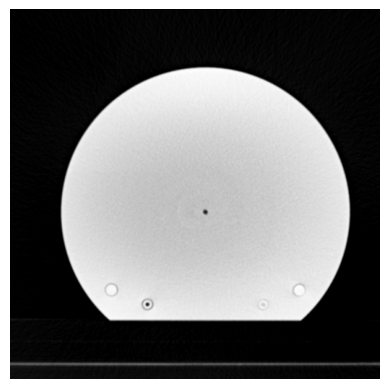

In [82]:
reader.SetFileNames(series_file_names[series_IDs[0]])
img = reader.Execute()
# Display the image slice from the middle of the stack, z axis
z = int(img.GetDepth() / 2)

import matplotlib.pyplot as plt

plt.imshow(sitk.GetArrayViewFromImage(img)[slice_z, :, :], cmap=plt.cm.Greys_r)
plt.axis("off")

In [74]:
print(img.GetOrigin())

print(img[:, :, z].GetOrigin())

(-127.75, -368.25, -59.0)
(-127.75, -368.25)


In [77]:
img.GetSpacing()

(0.5, 0.5, 1.0)

In [60]:
series_IDs

('1.2.246.352.71.2.855512968882.250673.20250616082202',)

In [83]:
#dsS